# MADD matrix

In [1]:
import maddpkg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
seed = 0

## Data

In [3]:
path_to_data = "./data_courseBBB_age_binarized/"
X_train = pd.read_csv(path_to_data + "X_train_stClick_7030.csv")
X_test = pd.read_csv(path_to_data + "X_test_stClick_7030.csv")
y_train = pd.read_csv(path_to_data + "y_train_stClick_7030.csv").values.ravel()
y_test = pd.read_csv(path_to_data + "y_test_stClick_7030.csv").values.ravel()

In [4]:
print(X_train.shape)
print(X_test.shape)

(3709, 8)
(1590, 8)


In [168]:
X_train.shape[0] + X_test.shape[0]

5299

In [5]:
print(X_test["age"].unique())
print(X_test["disability"].unique())
print(X_test["gender"].unique())
print(X_test["poverty"].unique())

[1 0]
[0. 1.]
[0. 1.]
[1. 0.]


## Model learning

In [6]:
model = DecisionTreeClassifier(random_state=seed)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [7]:
print(accuracy_score(y_test, model.predict(X_test)))
print("baseline:", len(y_test[y_test == 1]) / len(y_test))

0.7081761006289308
baseline: 0.6981132075471698


## Evaluation

In [8]:
nb_sf = 4
sf = ["gender", "poverty", "disability", "age"]

In [9]:
sf_detailed = list()

for sf_name in sf:
    sf_detailed.append(sf_name+"1")
    sf_detailed.append(sf_name+"0")
    
print(sf_detailed)

['gender1', 'gender0', 'poverty1', 'poverty0', 'disability1', 'disability0', 'age1', 'age0']


In [10]:
from itertools import combinations

combi_all = list(combinations(sf_detailed, 4))
combi = list()

for elem in combi_all:
    count_identical = 0
    for i in range(len(elem) - 1):
        if elem[i][:3] == elem[i+1][:3]:
            count_identical += 1
    if count_identical == 0:
        combi.append(elem)

print("Length:", len(combi))

Length: 16


In [11]:
combi

[('gender1', 'poverty1', 'disability1', 'age1'),
 ('gender1', 'poverty1', 'disability1', 'age0'),
 ('gender1', 'poverty1', 'disability0', 'age1'),
 ('gender1', 'poverty1', 'disability0', 'age0'),
 ('gender1', 'poverty0', 'disability1', 'age1'),
 ('gender1', 'poverty0', 'disability1', 'age0'),
 ('gender1', 'poverty0', 'disability0', 'age1'),
 ('gender1', 'poverty0', 'disability0', 'age0'),
 ('gender0', 'poverty1', 'disability1', 'age1'),
 ('gender0', 'poverty1', 'disability1', 'age0'),
 ('gender0', 'poverty1', 'disability0', 'age1'),
 ('gender0', 'poverty1', 'disability0', 'age0'),
 ('gender0', 'poverty0', 'disability1', 'age1'),
 ('gender0', 'poverty0', 'disability1', 'age0'),
 ('gender0', 'poverty0', 'disability0', 'age1'),
 ('gender0', 'poverty0', 'disability0', 'age0')]

In [163]:
%%time

madd_matrix = np.zeros((len(combi), len(combi)))
sens = np.zeros((len(combi), len(combi)))
len_groupes = list()

# compare combi1 with all combi2 and add results in matric
    # get the sub datasets
    # apply the madd

for i in range(len(combi)): # 16
    #print("Group:", i, end="\r")
    print("=====", i)
    
    x1_ = X_test.copy()
    
    combi1 = combi[i]
    for k in range(len(combi1)): # 4
            elem = combi1[k]
            num = int(elem[-1])
            sf_name = elem[:-1]
            x1_ = x1_[x1_[sf_name] == num]
    y_pp_combi1 = model.predict_proba(x1_)[:, 1] 
    len_groupes.append(len(y_pp_combi1))
    
    for j in range(len(combi)): # 16
        
        x2_ = X_test.copy()
        
        combi2 = combi[j]
        for k in range(len(combi2)): # 4
            elem = combi2[k]
            num = int(elem[-1])
            sf_name = elem[:-1]
            x2_ = x2_[x2_[sf_name] == num]
        y_pp_combi2 = model.predict_proba(x2_)[:, 1]
       
        madd = maddpkg.MADD(h="auto", pred_proba_sf0=np.array(y_pp_combi1), 
                            pred_proba_sf1=np.array(y_pp_combi2))
        
        print(np.mean(y_pp_combi1))
        print(np.mean(y_pp_combi2))
        
        bool = -1
        if np.mean(y_pp_combi1) == np.mean(y_pp_combi2):
            bool = 0
        elif np.mean(y_pp_combi1) > np.mean(y_pp_combi2) :
            bool = 1
        
        sens[i][j] = bool
        print("   sens:", sens[i][j])

        madd_matrix[i][j] = madd

madd_matrix

===== 0
0.0
0.0
   sens: 0.0
0.0
0.4
   sens: -1.0
0.0
0.5340909090909091
   sens: -1.0
0.0
0.6818181818181818
   sens: -1.0
0.0
1.0
   sens: -1.0
0.0
0.7
   sens: -1.0
0.0
0.7285714285714285
   sens: -1.0
0.0
0.6931818181818182
   sens: -1.0
0.0
0.41935483870967744
   sens: -1.0
0.0
0.5729166666666666
   sens: -1.0
0.0
0.7200854700854701
   sens: -1.0
0.0
0.6407263294422828
   sens: -1.0
0.0
1.0
   sens: -1.0
0.0
0.7777777777777778
   sens: -1.0
0.0
0.830952380952381
   sens: -1.0
0.0
0.7476780185758514
   sens: -1.0
===== 1
0.4
0.0
   sens: 1.0
0.4
0.4
   sens: 0.0
0.4
0.5340909090909091
   sens: -1.0
0.4
0.6818181818181818
   sens: -1.0
0.4
1.0
   sens: -1.0
0.4
0.7
   sens: -1.0
0.4
0.7285714285714285
   sens: -1.0
0.4
0.6931818181818182
   sens: -1.0
0.4
0.41935483870967744
   sens: -1.0
0.4
0.5729166666666666
   sens: -1.0
0.4
0.7200854700854701
   sens: -1.0
0.4
0.6407263294422828
   sens: -1.0
0.4
1.0
   sens: -1.0
0.4
0.7777777777777778
   sens: -1.0
0.4
0.830952380952381
   s

1.0
0.5340909090909091
   sens: 1.0
1.0
0.6818181818181818
   sens: 1.0
1.0
1.0
   sens: 0.0
1.0
0.7
   sens: 1.0
1.0
0.7285714285714285
   sens: 1.0
1.0
0.6931818181818182
   sens: 1.0
1.0
0.41935483870967744
   sens: 1.0
1.0
0.5729166666666666
   sens: 1.0
1.0
0.7200854700854701
   sens: 1.0
1.0
0.6407263294422828
   sens: 1.0
1.0
1.0
   sens: 0.0
1.0
0.7777777777777778
   sens: 1.0
1.0
0.830952380952381
   sens: 1.0
1.0
0.7476780185758514
   sens: 1.0
===== 13
0.7777777777777778
0.0
   sens: 1.0
0.7777777777777778
0.4
   sens: 1.0
0.7777777777777778
0.5340909090909091
   sens: 1.0
0.7777777777777778
0.6818181818181818
   sens: 1.0
0.7777777777777778
1.0
   sens: -1.0
0.7777777777777778
0.7
   sens: 1.0
0.7777777777777778
0.7285714285714285
   sens: 1.0
0.7777777777777778
0.6931818181818182
   sens: 1.0
0.7777777777777778
0.41935483870967744
   sens: 1.0
0.7777777777777778
0.5729166666666666
   sens: 1.0
0.7777777777777778
0.7200854700854701
   sens: 1.0
0.7777777777777778
0.64072632

array([[0.        , 0.8       , 1.09090909, 1.36363636, 2.        ,
        1.6       , 1.48571429, 1.40909091, 0.83870968, 1.16666667,
        1.47008547, 1.31906615, 2.        , 1.55555556, 1.66666667,
        1.51702786],
       [0.8       , 0.        , 0.29090909, 0.56363636, 1.2       ,
        0.8       , 0.68571429, 0.60909091, 0.03870968, 0.36666667,
        0.67008547, 0.51906615, 1.2       , 0.75555556, 0.86666667,
        0.71702786],
       [1.09090909, 0.29090909, 0.        , 0.31818182, 0.95454545,
        0.50909091, 0.39480519, 0.31818182, 0.25219941, 0.07954545,
        0.37917638, 0.22815706, 0.95454545, 0.51010101, 0.61168831,
        0.42822967],
       [1.36363636, 0.56363636, 0.31818182, 0.        , 0.63636364,
        0.4       , 0.12207792, 0.04545455, 0.52492669, 0.23863636,
        0.10644911, 0.13017333, 0.63636364, 0.19191919, 0.3030303 ,
        0.1533915 ],
       [2.        , 1.2       , 0.95454545, 0.63636364, 0.        ,
        0.8       , 0.57142857, 

In [164]:
len_groupes

[3, 10, 44, 44, 1, 5, 35, 44, 31, 48, 234, 514, 17, 27, 210, 323]

In [166]:
np.sum(len_groupes)

1590

In [165]:
combi[4]

('gender1', 'poverty0', 'disability1', 'age1')

In [13]:
madd_matrix = madd_matrix.copy()

## Visualisation

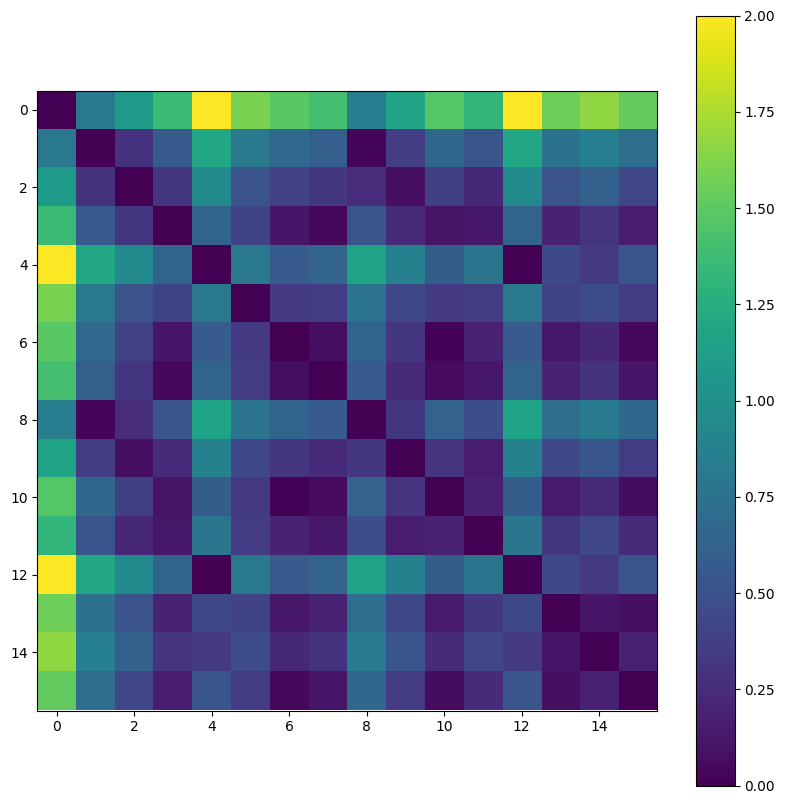

In [20]:
plt.figure(figsize = (10,10))
plt.imshow(madd_matrix)
plt.colorbar()
plt.show()

In [21]:
np.max(madd_matrix)

2.0

In [23]:
test = madd_matrix.copy()
test[test < 0.85] = 0

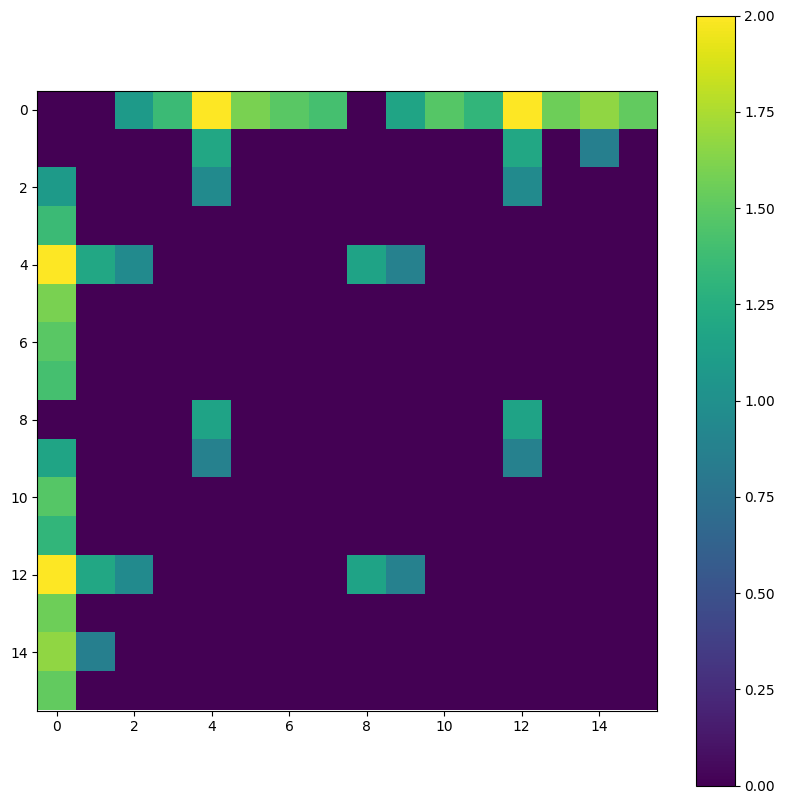

In [24]:
plt.figure(figsize = (10,10))
plt.imshow(test)
plt.colorbar()
plt.show()

In [25]:
combi

[('gender1', 'poverty1', 'disability1', 'age1'),
 ('gender1', 'poverty1', 'disability1', 'age0'),
 ('gender1', 'poverty1', 'disability0', 'age1'),
 ('gender1', 'poverty1', 'disability0', 'age0'),
 ('gender1', 'poverty0', 'disability1', 'age1'),
 ('gender1', 'poverty0', 'disability1', 'age0'),
 ('gender1', 'poverty0', 'disability0', 'age1'),
 ('gender1', 'poverty0', 'disability0', 'age0'),
 ('gender0', 'poverty1', 'disability1', 'age1'),
 ('gender0', 'poverty1', 'disability1', 'age0'),
 ('gender0', 'poverty1', 'disability0', 'age1'),
 ('gender0', 'poverty1', 'disability0', 'age0'),
 ('gender0', 'poverty0', 'disability1', 'age1'),
 ('gender0', 'poverty0', 'disability1', 'age0'),
 ('gender0', 'poverty0', 'disability0', 'age1'),
 ('gender0', 'poverty0', 'disability0', 'age0')]

## New matrix

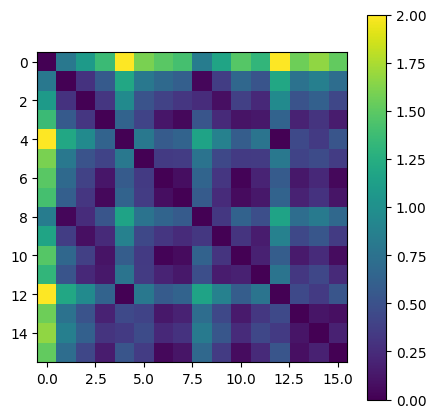

In [44]:
plt.figure(figsize = (5,5))
plt.imshow(madd_matrix)
plt.colorbar()
plt.show()

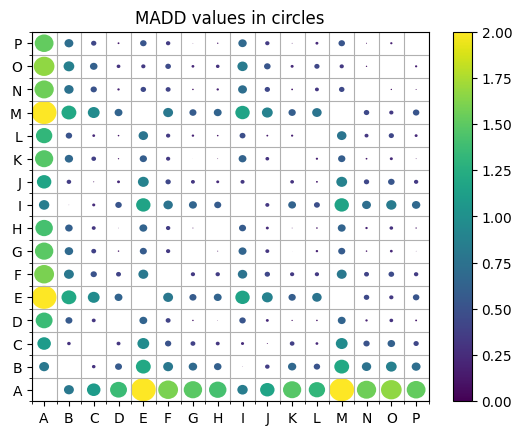

In [68]:
#https://stackoverflow.com/questions/59381273/heatmap-with-circles-indicating-size-of-population
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection

xlabels = [chr(code) for code in range(65, 65+madd_matrix.shape[0])]
ylabels = xlabels.copy()

x, y = np.meshgrid(np.arange(madd_matrix.shape[0]), np.arange(madd_matrix.shape[0]))


s = madd_matrix
c = madd_matrix

fig, ax = plt.subplots()

R = s/s.max()/2
circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
col = PatchCollection(circles, array=c.flatten(), cmap="RdYlBu_r")
ax.add_collection(col)

ax.set(xticks=np.arange(madd_matrix.shape[0]), yticks=np.arange(madd_matrix.shape[0]),
       xticklabels=xlabels, yticklabels=ylabels)
ax.set_xticks(np.arange(madd_matrix.shape[0]+1)-0.5, minor=True)
ax.set_yticks(np.arange(madd_matrix.shape[0]+1)-0.5, minor=True)
ax.grid(which='minor')

fig.colorbar(col)
plt.title("MADD values in circles")
plt.show()

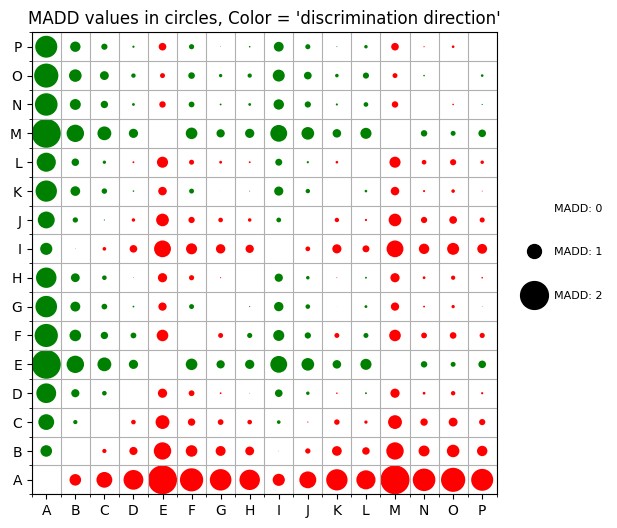

In [149]:
from  matplotlib.colors import LinearSegmentedColormap
cmap_personalized=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256)

xlabels = [chr(code) for code in range(65, 65+madd_matrix.shape[0])]
ylabels = xlabels.copy()

x, y = np.meshgrid(np.arange(madd_matrix.shape[0]), np.arange(madd_matrix.shape[0]))

s = madd_matrix
c = sens

fig, ax = plt.subplots(figsize=(6,6))

R = s/s.max()/2 # there are radius of circle depending on values of s
circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat) ]    

col = PatchCollection(circles, array=c.flatten(), cmap=cmap_personalized)
ax.add_collection(col)

ax.set(xticks=np.arange(madd_matrix.shape[0]), 
       yticks=np.arange(madd_matrix.shape[0]),
       xticklabels=xlabels, 
       yticklabels=ylabels)

ax.set_xticks(np.arange(madd_matrix.shape[0]+1)-0.5, minor=True)
ax.set_yticks(np.arange(madd_matrix.shape[0]+1)-0.5, minor=True)
ax.grid(which='minor')

# Generate legend box with circle sizes
#gll = plt.scatter([],[], s=0, marker='o', color='#555555')
#gl = plt.scatter([],[], s=1*100, marker='o', color='#555555') # multiplier par 100 le radius pour avoir size
#ga = plt.scatter([],[], s=2*100, marker='o', color='#555555')
#plt.legend((gll,gl,ga),('MADD: 0', 'MADD: 1', 'MADD: 2'),scatterpoints=1,ncol=1,fontsize=8,
#           bbox_to_anchor=(1.25, 0.55),labelspacing = 2)


# Create legend circles with sizes 0, 1, 2
from matplotlib.lines import Line2D
legend_handles = [
    Line2D([], [], color='black', marker='o', markersize=0, linestyle='None', label='MADD: 0'),
    Line2D([], [], color='black', marker='o', markersize=10, linestyle='None', label='MADD: 1'),
    Line2D([], [], color='black', marker='o', markersize=20, linestyle='None', label='MADD: 2')
]
# Add legend with circles
plt.legend(handles=legend_handles, loc='upper right', fontsize=8,
           bbox_to_anchor=(1.25, 0.65), labelspacing=3, frameon=False)

#fig.colorbar(col)
plt.title("MADD values in circles, Color = 'discrimination direction'")
plt.show()

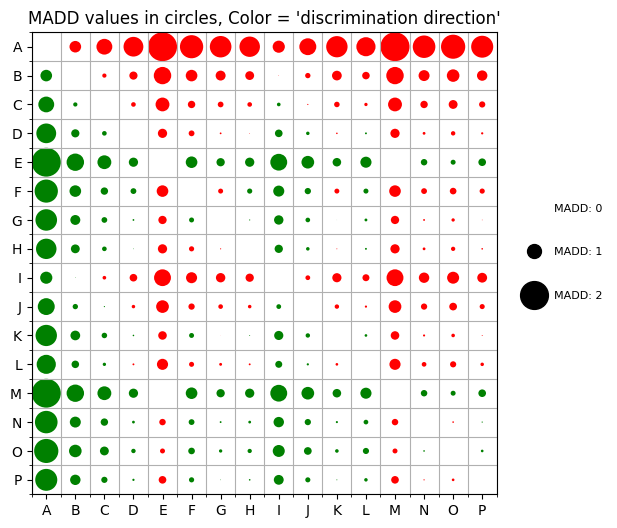

In [162]:
# J'essaye de modifier le sens de la matrice dans le plot

from  matplotlib.colors import LinearSegmentedColormap
cmap_personalized=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256)

xlabels = [chr(code) for code in range(65, 65+madd_matrix.shape[0])]
ylabels = xlabels.copy()

x, y = np.meshgrid(np.arange(madd_matrix.shape[0]), np.arange(madd_matrix.shape[0]))

s = madd_matrix
c = sens

fig, ax = plt.subplots(figsize=(6,6))

R = s/s.max()/2 # there are radius of circle depending on values of s
#circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat) ]

cirlces = list()
for i in range(madd_matrix.shape[0]):
    for j in range(madd_matrix.shape[0]):
        cirlces.append(plt.Circle((j,i), radius=R[i][j]))
    
col = PatchCollection(circles, array=c.flatten(), cmap=cmap_personalized)
ax.add_collection(col)

ax.set(xticks=np.arange(madd_matrix.shape[0]), 
       yticks=np.arange(madd_matrix.shape[0]),
       xticklabels=xlabels, 
       yticklabels=ylabels)

ax.set_xticks(np.arange(madd_matrix.shape[0]+1)-0.5, minor=True)
ax.set_yticks(np.arange(madd_matrix.shape[0]+1)-0.5, minor=True)
ax.grid(which='minor')


# Create legend circles with sizes 0, 1, 2
from matplotlib.lines import Line2D
legend_handles = [
    Line2D([], [], color='black', marker='o', markersize=0, linestyle='None', label='MADD: 0'),
    Line2D([], [], color='black', marker='o', markersize=10, linestyle='None', label='MADD: 1'),
    Line2D([], [], color='black', marker='o', markersize=20, linestyle='None', label='MADD: 2')
]
# Add legend with circles
plt.legend(handles=legend_handles, loc='upper right', fontsize=8,
           bbox_to_anchor=(1.25, 0.65), labelspacing=3, frameon=False)


# Flip the initial plot vertically
ax.invert_yaxis()

#fig.colorbar(col)
plt.title("MADD values in circles, Color = 'discrimination direction'")
plt.show()

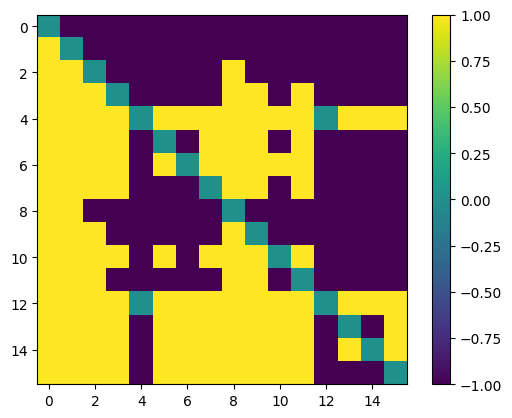

In [159]:
plt.imshow(sens)
plt.colorbar()

In [158]:
sens

array([[ 0., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1.],
       [ 1.,  0., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1.],
       [ 1.,  1.,  0., -1., -1., -1., -1., -1.,  1., -1., -1., -1., -1.,
        -1., -1., -1.],
       [ 1.,  1.,  1.,  0., -1., -1., -1., -1.,  1.,  1., -1.,  1., -1.,
        -1., -1., -1.],
       [ 1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,
         1.,  1.,  1.],
       [ 1.,  1.,  1.,  1., -1.,  0., -1.,  1.,  1.,  1., -1.,  1., -1.,
        -1., -1., -1.],
       [ 1.,  1.,  1.,  1., -1.,  1.,  0.,  1.,  1.,  1.,  1.,  1., -1.,
        -1., -1., -1.],
       [ 1.,  1.,  1.,  1., -1., -1., -1.,  0.,  1.,  1., -1.,  1., -1.,
        -1., -1., -1.],
       [ 1.,  1., -1., -1., -1., -1., -1., -1.,  0., -1., -1., -1., -1.,
        -1., -1., -1.],
       [ 1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,  0., -1., -1., -1.,
        -1., -1., -1.],
       [ 1.,  1.,  1.,  1., -1